### LIBRARY IMPORTING


In [203]:
#GENERAL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#PATH PROCESS
import os
from pathlib import Path
#IMAGE PROCESS
import cv2

### PATH PROCESSING


In [151]:
Main_JPG_Data = Path("../images_gz2/images")

In [152]:
JPG_Path = list(Main_JPG_Data.glob(r"*.jpg"))

In [153]:
JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)

In [154]:
print(JPG_Path_Series.head(-1))

0            ..\images_gz2\images\100.jpg
1           ..\images_gz2\images\1000.jpg
2          ..\images_gz2\images\10000.jpg
3         ..\images_gz2\images\100000.jpg
4         ..\images_gz2\images\100001.jpg
                       ...               
243428     ..\images_gz2\images\99994.jpg
243429     ..\images_gz2\images\99995.jpg
243430     ..\images_gz2\images\99996.jpg
243431     ..\images_gz2\images\99997.jpg
243432     ..\images_gz2\images\99998.jpg
Name: JPG, Length: 243433, dtype: object


## VISUALIZATION

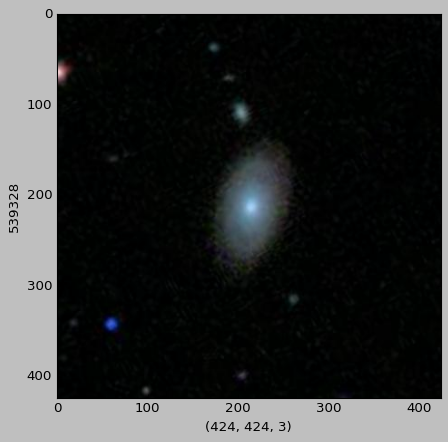

In [155]:
plt.style.use("classic")
Example_IMG = cv2.imread(JPG_Path_Series[2137])
plt.xlabel(Example_IMG.shape)
plt.ylabel(Example_IMG.size)
plt.imshow(Example_IMG)

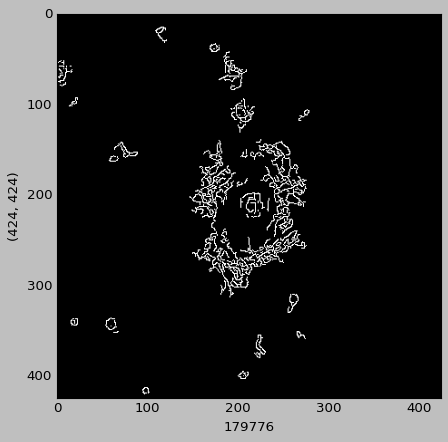

In [156]:
Example_IMG = cv2.imread(JPG_Path_Series[2137])
Canny_IMG = cv2.Canny(Example_IMG,5,80)
plt.xlabel(Canny_IMG.size)
plt.ylabel(Canny_IMG.shape)
plt.imshow(Canny_IMG,cmap="Greys_r")

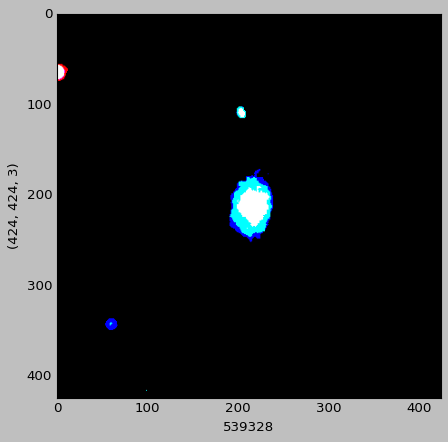

In [157]:
Example_IMG = cv2.imread(JPG_Path_Series[2137])
_,Thresh_IMG = cv2.threshold(Example_IMG,90,255,cv2.THRESH_BINARY)
plt.xlabel(Thresh_IMG.size)
plt.ylabel(Thresh_IMG.shape)
plt.imshow(Thresh_IMG,cmap="Greys_r")

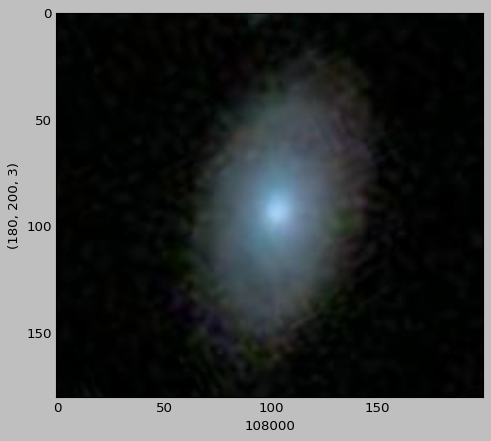

In [158]:
Example_IMG = cv2.imread(JPG_Path_Series[2137])
Cut_Example_IMG = Example_IMG[120:300,110:310]
plt.xlabel(Cut_Example_IMG.size)
plt.ylabel(Cut_Example_IMG.shape)
plt.imshow(Cut_Example_IMG)

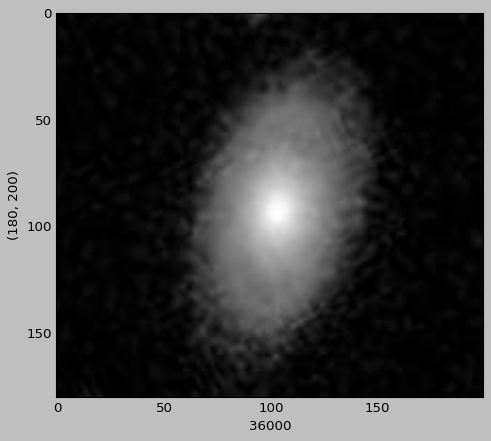

In [159]:
Example_IMG = cv2.imread(JPG_Path_Series[2137],0)
Cut_Example_IMG = Example_IMG[120:300,110:310]

plt.xlabel(Cut_Example_IMG.size)
plt.ylabel(Cut_Example_IMG.shape)
plt.imshow(Cut_Example_IMG,cmap="Greys_r")

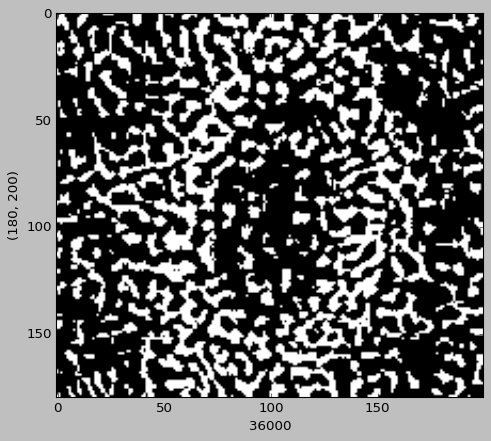

In [160]:
Example_IMG = cv2.imread(JPG_Path_Series[2137],0)
Cut_Example_IMG = Example_IMG[120:300,110:310]
AdaptiveThresh_IMG = cv2.adaptiveThreshold(Cut_Example_IMG,200,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)
plt.xlabel(AdaptiveThresh_IMG.size)
plt.ylabel(AdaptiveThresh_IMG.shape)
plt.imshow(AdaptiveThresh_IMG,cmap="Greys_r")

## Cross-referencing the images with Table 1

Reading data about galaxies from the file downloaded from kaggle

In [161]:
galaxies = pd.read_csv("../data/gz2_filename_mapping.csv")
galaxies

,objid,sample,asset_id
0,587722981736120347,original,1
1,587722981736579107,original,2
2,587722981741363294,original,3
3,587722981741363323,original,4
4,587722981741559888,original,5
...,...,...,...
355985,8647475122541625731,stripe82_coadd_2,355986
355986,8647475122541625762,stripe82_coadd_2,355987
355987,8647475122541625774,stripe82_coadd_2,355988
355988,8647475122761762019,stripe82_coadd_2,355989


Reading Table1 containing galaxies' descriptions presented in Hart et al. (2016)

In [162]:
table1 = pd.read_csv("../data/gz2_hart16.csv")
table1.rename(columns={'dr7objid':'objid'},inplace=True)
table1

,objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,45,342,0,...,0.450,0.450,0.482646,0,16,16.0,0.400,0.400,0.394506,0
1,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,42,332,1,...,0.512,0.503,0.504833,0,13,13.0,0.317,0.323,0.322743,0
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,36,125,28,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
3,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,28,218,1,...,0.240,0.240,0.241322,0,6,6.0,0.240,0.240,0.239765,0
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,43,151,33,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239690,587741490371625059,167.542648,28.991867,11:10:10.23,+28:59:30.7,extra,Ec,42,135,34,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
239691,587731174917669027,316.108826,1.214799,21:04:26.12,+01:12:53.3,stripe82,Ei(i),46,186,25,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
239692,587731512070177108,21.690212,-0.546427,01:26:45.65,+00:32:47.1,stripe82,Ei,48,164,36,...,0.000,0.000,0.000000,0,2,2.0,1.000,1.000,1.000000,1
239693,587731513145688256,25.747143,0.360079,01:42:59.31,+00:21:36.3,stripe82,Ei(i),48,204,25,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0


Left join on this both tables

In [163]:
dataset = pd.merge(galaxies, table1, on = 'objid', how = 'left')

In [164]:
test = dataset.loc[dataset['dec'].isna()]
test

,objid,sample_x,asset_id,ra,dec,rastring,decstring,sample_y,gz2_class,total_classifications,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587722981736120347,original,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,587722981736579107,original,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,587722981741691055,original,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,587722981745819655,original,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,587722981746082020,original,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355985,8647475122541625731,stripe82_coadd_2,355986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355986,8647475122541625762,stripe82_coadd_2,355987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355987,8647475122541625774,stripe82_coadd_2,355988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355988,8647475122761762019,stripe82_coadd_2,355989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have noticed that around 116295 rows from the galaxies file don't exist in the table1. We have also found out that galaxies file contains some galaxies that are not represented by any image. We'll try to delete them.

First, let's try to create a list of asset_id of images that we currently have access to.

In [165]:
list_of_images = pd.DataFrame(JPG_Path_Series)

# Extracting the file name without extension
list_of_images['asset_id'] = list_of_images['JPG'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

list_of_images = list_of_images.drop('JPG', axis=1)

list_of_images['asset_id'] = list_of_images['asset_id'].astype(int)

list_of_images

,asset_id
0,100
1,1000
2,10000
3,100000
4,100001
...,...
243429,99995
243430,99996
243431,99997
243432,99998


Now let's delete all the rows which don't have any image representation. We'll do it by left join.

In [166]:
dataset = pd.merge(list_of_images, dataset, on = 'asset_id', how = 'left')

dataset

,asset_id,objid,sample_x,ra,dec,rastring,decstring,sample_y,gz2_class,total_classifications,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,100,587722981748113567,original,198.368484,-1.211204,13:13:28.44,-01:12:40.3,original,Sc?t(r),47.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.000,1.000,1.000,1.0
1,1000,587722983355384011,original,190.666809,0.157213,12:42:40.03,+00:09:26.0,original,Er,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0
2,10000,587725552269000786,original,119.198418,45.877827,07:56:47.62,+45:52:40.2,original,Ei,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0
3,100000,587736915138969726,original,213.330490,12.739978,14:13:19.32,+12:44:23.9,original,Ser,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0
4,100001,587736915139035228,original,213.468445,12.696736,14:13:52.43,+12:41:48.3,original,Ei,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243429,99995,587736915138445458,original,212.127396,12.819022,14:08:30.57,+12:49:08.5,original,Sd(i),34.0,...,0.2,0.2,0.2,0.0,6.0,6.0,0.600,0.600,0.600,0.0
243430,99996,587736915138445484,original,212.128525,12.801238,14:08:30.85,+12:48:04.5,original,Sd(i),38.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.667,0.667,0.667,0.0
243431,99997,587736915138576534,original,212.507202,12.872880,14:10:01.73,+12:52:22.4,original,Ser,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0
243432,99998,587736915138773162,original,212.951721,12.791821,14:11:48.41,+12:47:30.6,original,Er,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0


In [167]:
missing_description = dataset.loc[dataset['dec'].isna()]
missing_description

,asset_id,objid,sample_x,ra,dec,rastring,decstring,sample_y,gz2_class,total_classifications,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
443,100440,587736915688161582,original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,100517,587736916216447050,original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,100687,587736916751089740,original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
715,100724,587736916753186858,original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1701,101673,587736940910936227,original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242518,99101,587736812600426681,original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242660,99240,587736813137166677,original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243133,997,587722983355318470,original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243350,99910,587736914604195937,original,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


But it turns out we still have 3861 rows with a lot of NaNs. We decided to delete them, because it's not a statistically important sample (we have already enough or maybe even too much data for our needs). And model based on these missing observations may not be as accurate.

In [168]:
dataset = dataset.dropna(how = 'any')

dataset

,asset_id,objid,sample_x,ra,dec,rastring,decstring,sample_y,gz2_class,total_classifications,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,100,587722981748113567,original,198.368484,-1.211204,13:13:28.44,-01:12:40.3,original,Sc?t(r),47.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.000,1.000,1.000,1.0
1,1000,587722983355384011,original,190.666809,0.157213,12:42:40.03,+00:09:26.0,original,Er,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0
2,10000,587725552269000786,original,119.198418,45.877827,07:56:47.62,+45:52:40.2,original,Ei,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0
3,100000,587736915138969726,original,213.330490,12.739978,14:13:19.32,+12:44:23.9,original,Ser,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0
4,100001,587736915139035228,original,213.468445,12.696736,14:13:52.43,+12:41:48.3,original,Ei,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243429,99995,587736915138445458,original,212.127396,12.819022,14:08:30.57,+12:49:08.5,original,Sd(i),34.0,...,0.2,0.2,0.2,0.0,6.0,6.0,0.600,0.600,0.600,0.0
243430,99996,587736915138445484,original,212.128525,12.801238,14:08:30.85,+12:48:04.5,original,Sd(i),38.0,...,0.0,0.0,0.0,0.0,4.0,4.0,0.667,0.667,0.667,0.0
243431,99997,587736915138576534,original,212.507202,12.872880,14:10:01.73,+12:52:22.4,original,Ser,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0
243432,99998,587736915138773162,original,212.951721,12.791821,14:11:48.41,+12:47:30.6,original,Er,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0


We've done this deletion with our dataset, now let's do it with JPG_Path_Series

In [169]:
# Converting asset_id to string if it's not already, to match the file name extraction
list_of_assets = dataset['asset_id'].astype(str)

# Extracting the numeric part of the file name from the paths
# This assumes file names are structured as shown and are at the end of the path before the extension
numeric_part = JPG_Path_Series.apply(lambda x: os.path.splitext(os.path.basename(x))[0])

# Filter JPG_Path_Series based on whether the numeric part is in list_of_assets
JPG_Path_Series = JPG_Path_Series[numeric_part.isin(list_of_assets)]

# Reset the index of the filtered series
JPG_Path_Series = JPG_Path_Series.reset_index(drop=True)

# Show the filtered series
print(JPG_Path_Series)

0            ..\images_gz2\images\100.jpg
1           ..\images_gz2\images\1000.jpg
2          ..\images_gz2\images\10000.jpg
3         ..\images_gz2\images\100000.jpg
4         ..\images_gz2\images\100001.jpg
                       ...               
239262     ..\images_gz2\images\99995.jpg
239263     ..\images_gz2\images\99996.jpg
239264     ..\images_gz2\images\99997.jpg
239265     ..\images_gz2\images\99998.jpg
239266     ..\images_gz2\images\99999.jpg
Name: JPG, Length: 239267, dtype: object


# EDA

1. Basic Structure: Let's get the overall structure and try to identify missing values

In [178]:
structure_info = {
    "Total Rows": len(dataset),
    "Total Columns": len(dataset.columns),
    "Missing Values": dataset.isnull().sum().sum()
}

structure_info

{'Total Rows': 239267, 'Total Columns': 233, 'Missing Values': 0}

In our dataset we have currently 239637 rows so exactly as many as paths to photos in JPG_Path_Series. What's important, there no missing values in our dataset now so we don't have to worry about that

2. Galaxy Classifications: Distribution of 'gz2_class'

In [191]:
gz2_class_distribution = dataset['gz2_class'].value_counts()

gz2_class_distribution

gz2_class
Ei          43984
Er          36536
Ser         14008
Sc?t        13509
Ec          10146
            ...  
Sa?l(i)         1
Sa(u)           1
Sb4l(m)         1
Sb4t(m)         1
SBb4m(o)        1
Name: count, Length: 818, dtype: int64

That column might be important in clustering the galaxies. Elliptical galaxies may be indicated by classifications like 'E' followed by a number or descriptor. Spiral galaxies could be classified under 'S' or 'SB' with additional descriptors indicating the presence of arms, like 'Sc', 'Sb', 'Sa', etc. Irregular galaxies might be indicated by classes like 'Irr', 'Pec', or any notation that implies irregularity.
 

3. Visualizing Astronomical Data: Scatter plot of ra (right ascension) and dec (declination)

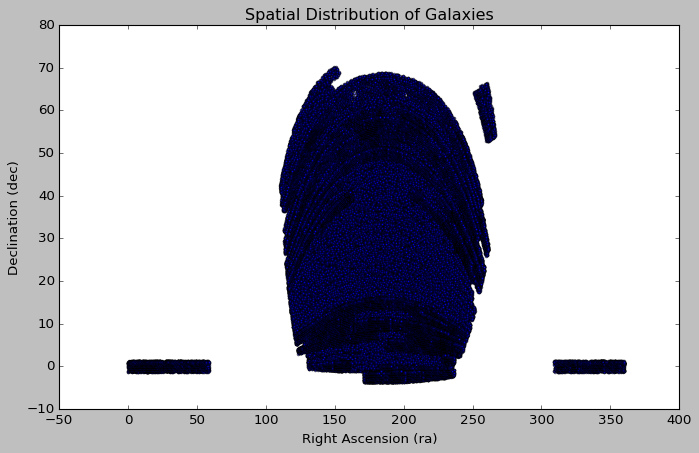

In [192]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['ra'], dataset['dec'], alpha=0.5, marker='.')
plt.xlabel('Right Ascension (ra)')
plt.ylabel('Declination (dec)')
plt.title('Spatial Distribution of Galaxies')
plt.show()

We can easily see four groups on this plot and we'll try to find out what can they indicate.

4. Statistical Summary: Summary statistics for numerical columns

In [194]:
numerical_stats = dataset.describe()

numerical_stats

,asset_id,objid,ra,dec,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
count,239267.000000,2.392670e+05,239267.000000,239267.000000,239267.000000,239267.000000,239267.000000,239267.000000,239267.000000,239267.000000,...,239267.000000,239267.000000,239267.000000,239267.00000,239267.000000,239267.000000,239267.000000,239267.000000,239267.000000,239267.000000
mean,141821.721876,5.878182e+17,185.328914,26.085338,42.567918,179.104920,27.602206,27.475721,0.639221,0.645434,...,0.017022,0.016633,0.025205,0.00996,1.752899,1.750502,0.263671,0.262566,0.250818,0.140747
std,81512.456508,1.827370e+14,47.854179,18.209139,5.856857,60.728768,13.261613,13.243680,0.284885,0.288226,...,0.098699,0.097010,0.122029,0.09930,3.268756,3.267107,0.364075,0.363494,0.356645,0.347761
min,3.000000,5.877230e+17,0.006464,-3.743851,16.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71608.500000,5.877327e+17,154.097565,10.677250,39.000000,140.000000,18.000000,18.000000,0.455000,0.459000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140276.000000,5.877393e+17,185.944046,24.767607,43.000000,156.000000,32.000000,32.000000,0.759000,0.768000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,212440.500000,5.877429e+17,219.811913,39.743044,46.000000,196.000000,38.000000,38.000000,0.862000,0.871000,...,0.000000,0.000000,0.000000,0.00000,2.000000,2.000000,0.500000,0.500000,0.434728,0.000000
max,295305.000000,5.888489e+17,359.988831,70.133217,79.000000,604.000000,68.000000,66.280998,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,33.000000,33.000000,1.000000,1.000000,1.000000,1.000000


5. Correlation Analysis: Correlation matrix for features starting with 't11_arms_number'

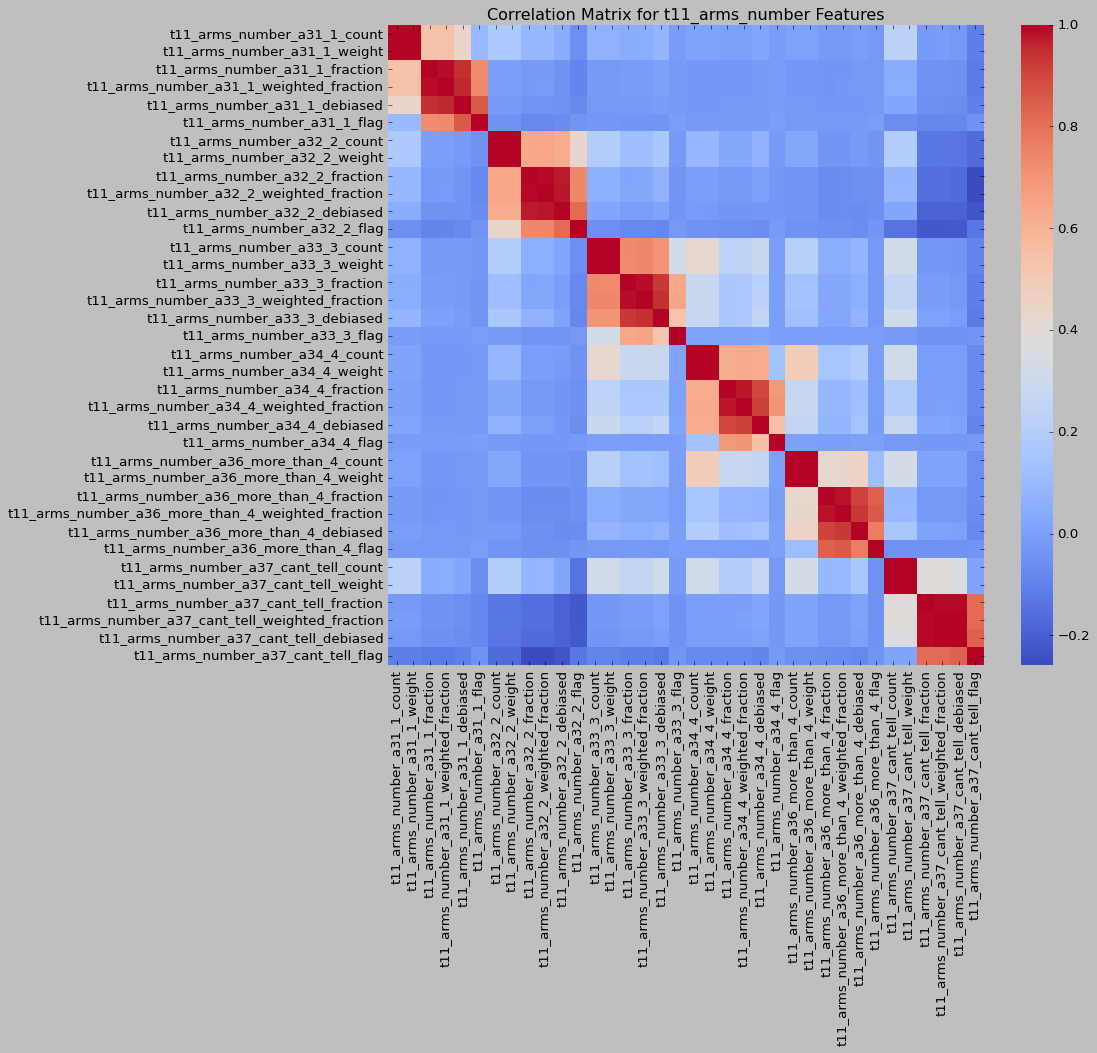

In [198]:
t11_columns = [col for col in dataset.columns if col.startswith('t11_arms_number')]
t11_corr = dataset[t11_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(t11_corr,  fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for t11_arms_number Features")
plt.show()

6. Feature Distribution: To further understand the distribution and identify any outliers or skewness in key features, let's plot histograms or density plots.

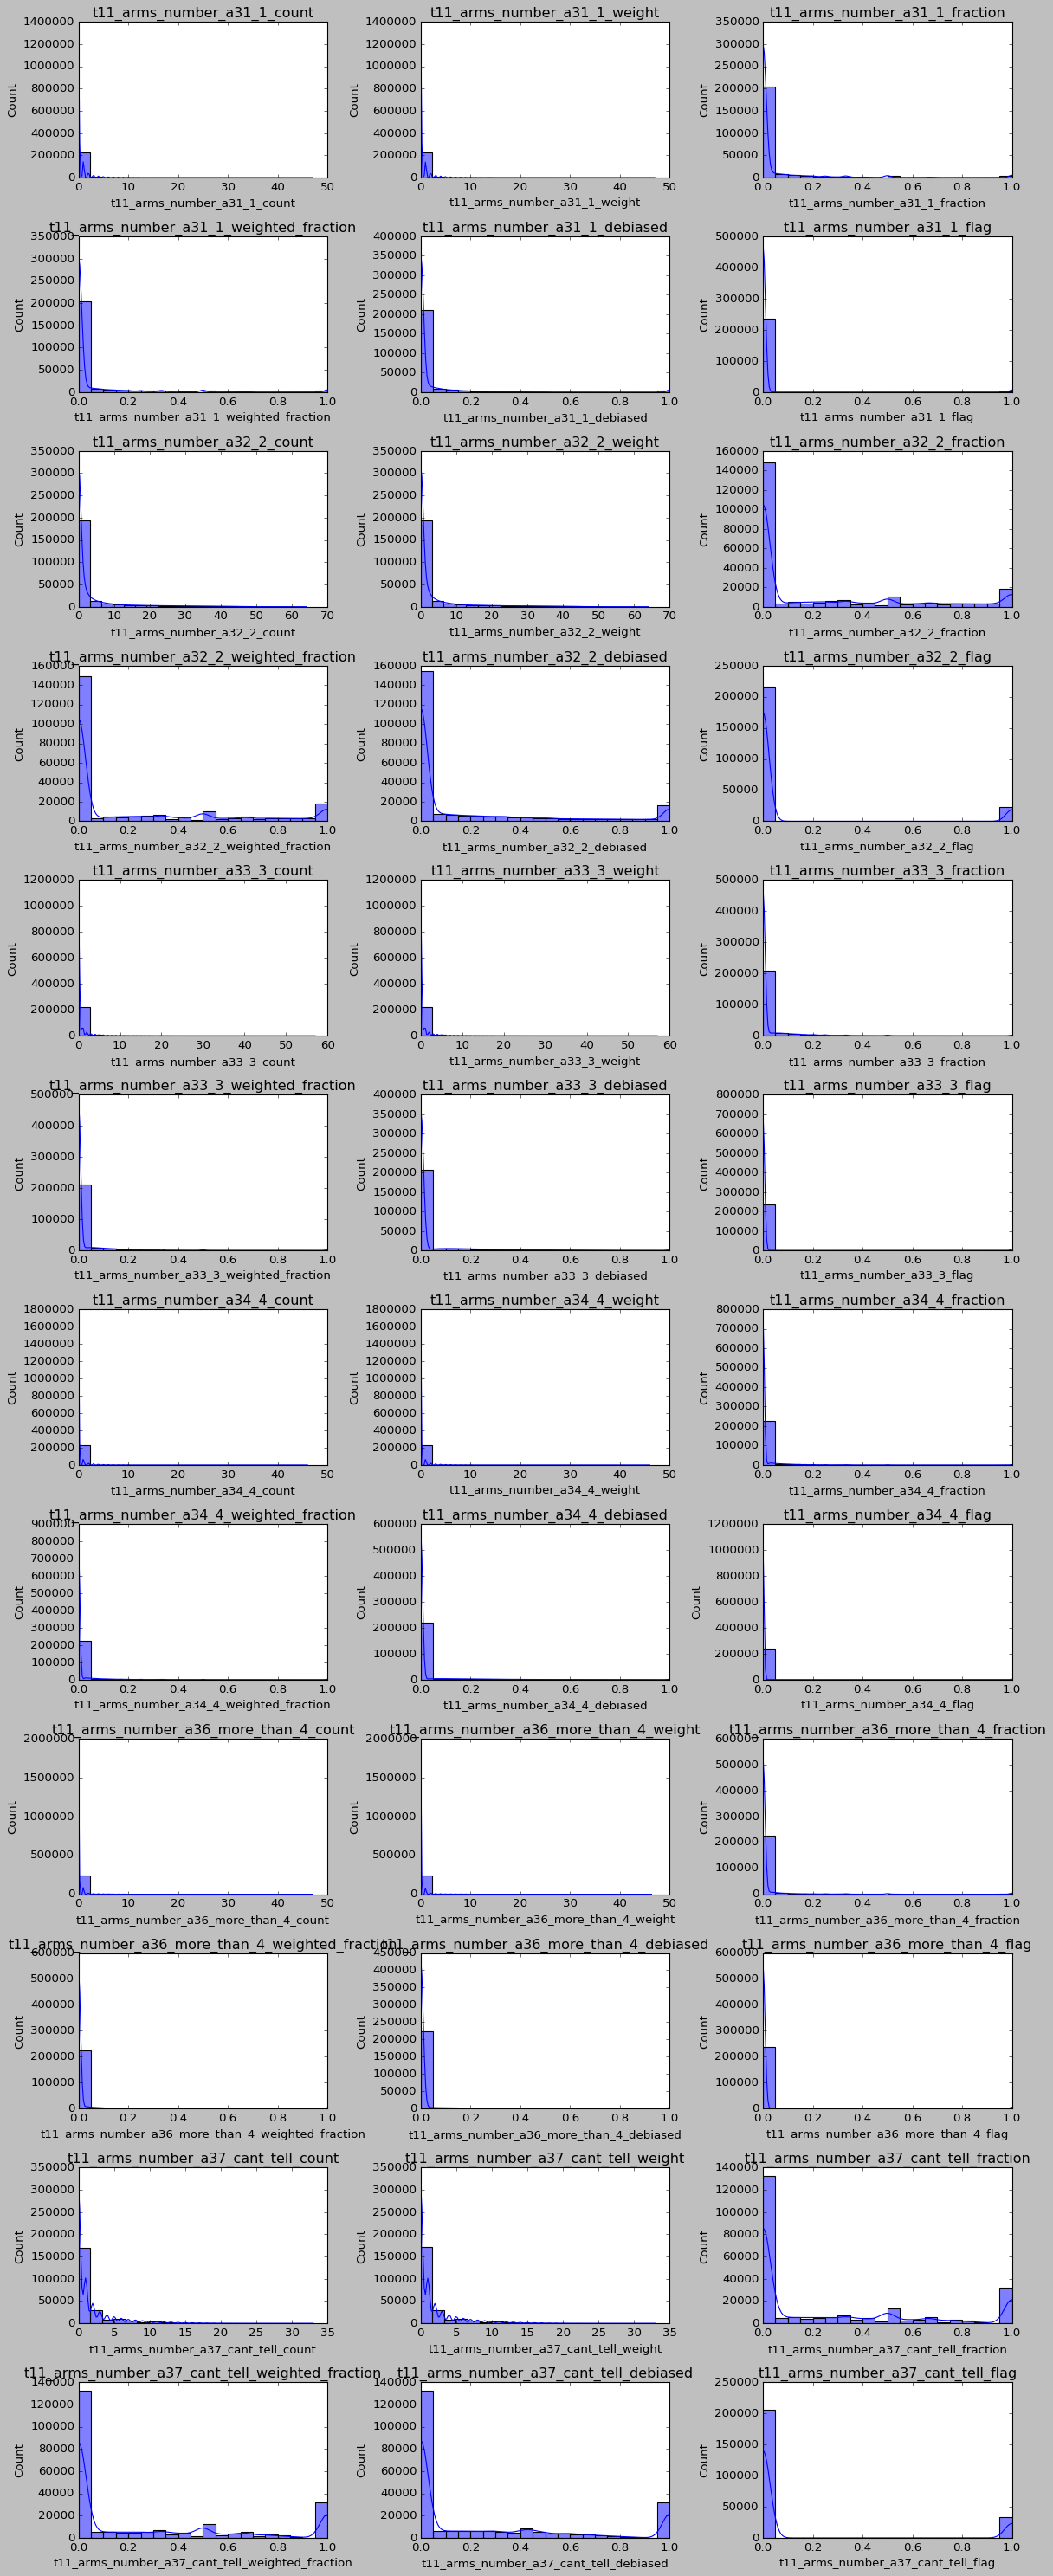

In [208]:
# Let's plot histograms or density plots for key features starting with 't11_arms_number'
plt.figure(figsize=(15,40))
for i, col in enumerate(t11_columns, 1):
    plt.subplot(len(t11_columns)//3 + 1, 3, i)
    sns.histplot(dataset[col], kde=True, bins=20, color='blue')
    plt.title(col)
    plt.tight_layout()

plt.show()

We can see that distributions of all the features are concentrated around value 0. Now let's find out how would these histograms look like if we didn't consider values equal to 0.

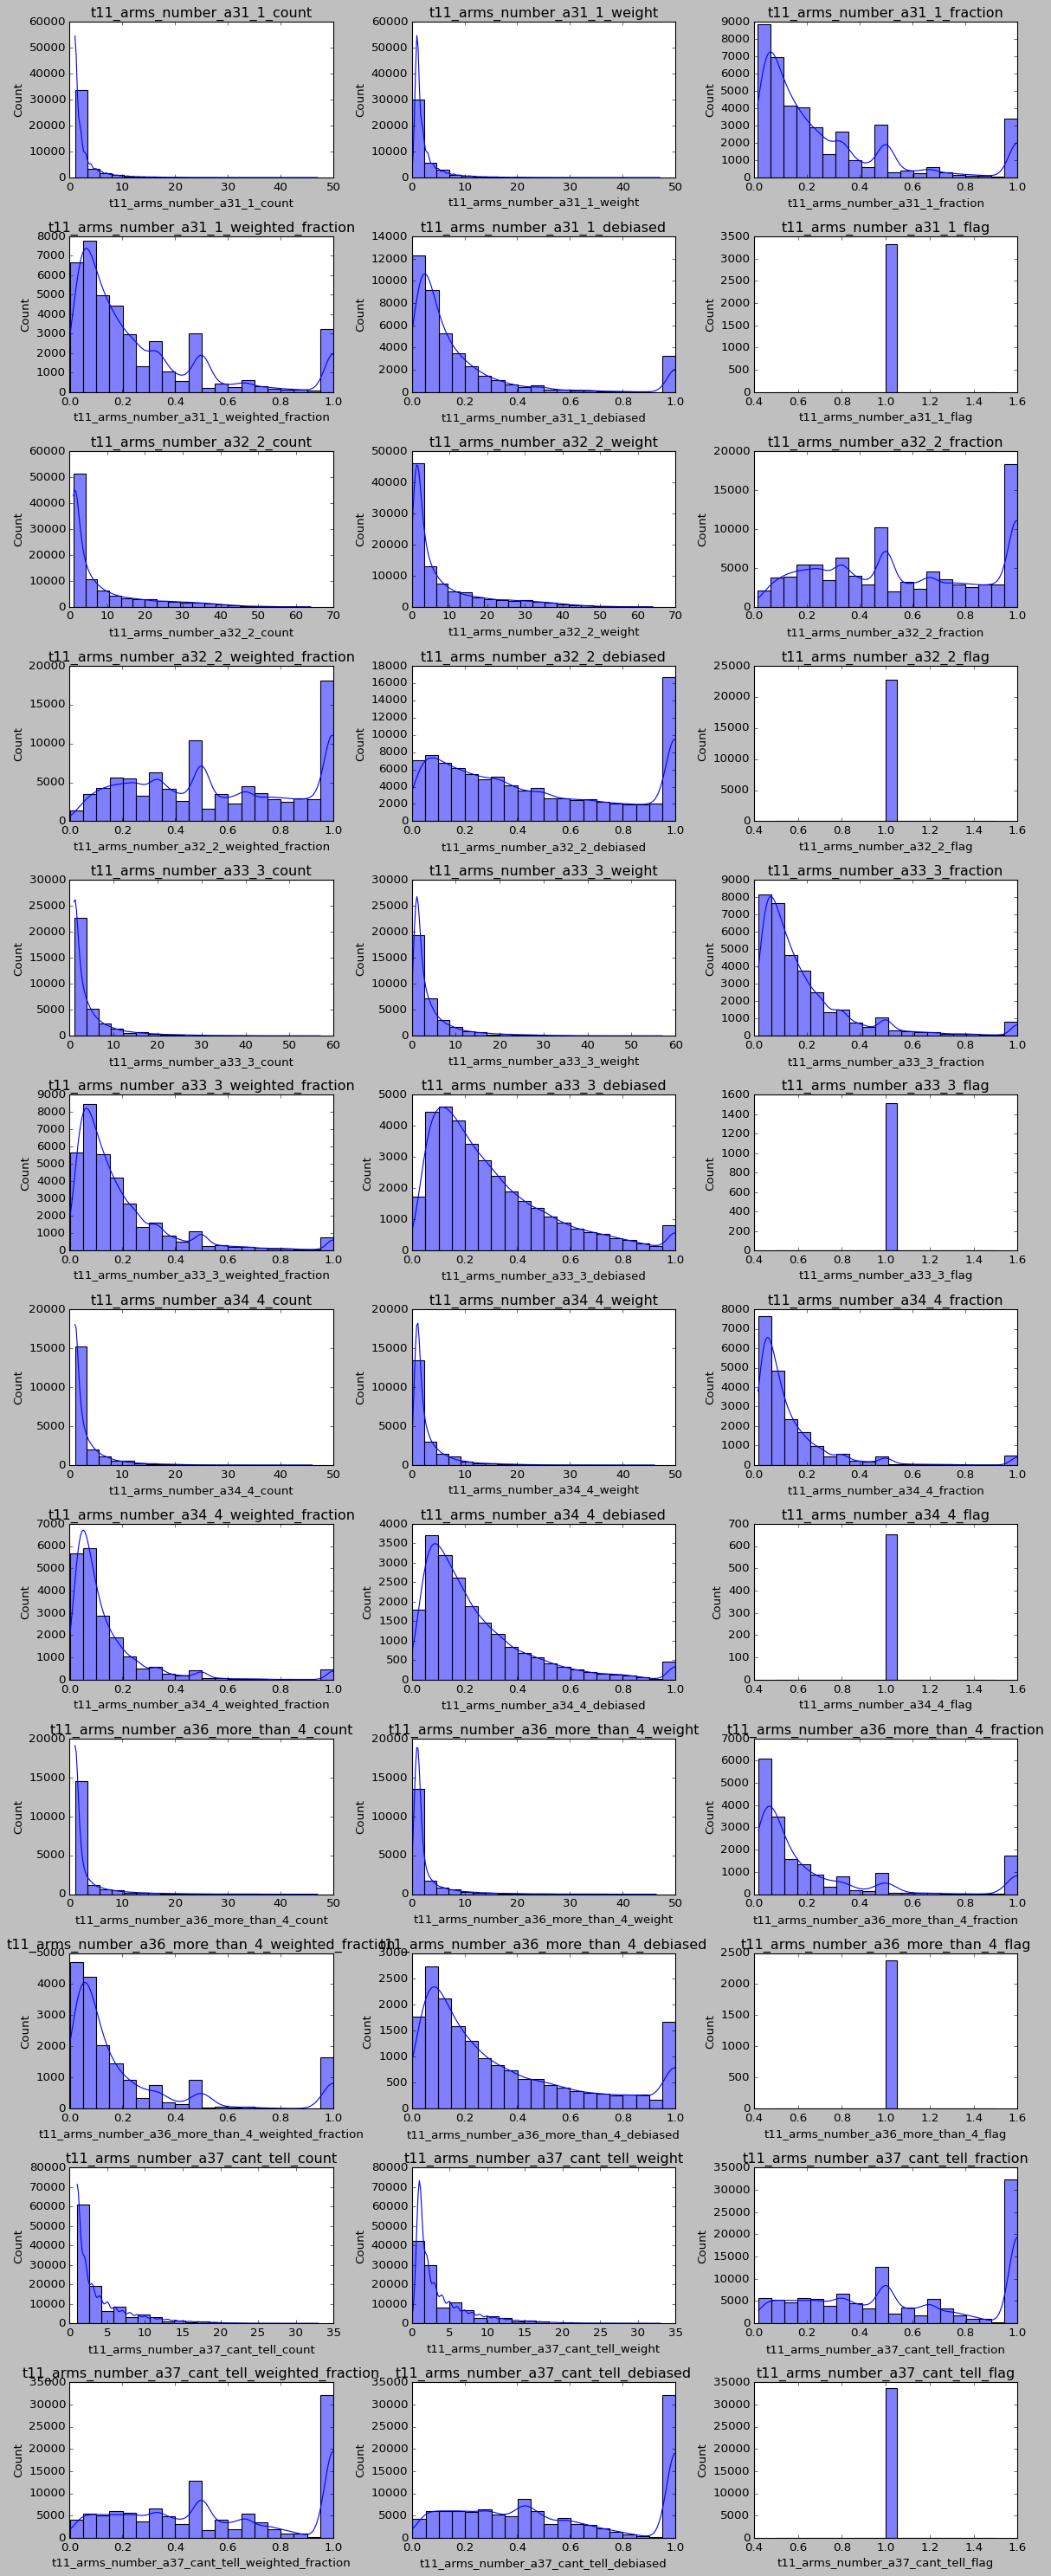

In [210]:
# Let's plot histograms or density plots for key features starting with 't11_arms_number'
plt.figure(figsize=(15,40))
for i, col in enumerate(t11_columns, 1):
    plt.subplot(len(t11_columns)//3 + 1, 3, i)
    data = dataset[col][dataset[col] > 0]
    sns.histplot(data, kde=True, bins=20, color='blue')
    plt.title(col)
    plt.tight_layout()

plt.show()

Now these histograms are much more interesting.